In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import seaborn as sb
sb.set()


# Loading the data

In [37]:
data = pd.read_csv("real_estate_price_size_year.csv")
data

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009
...,...,...,...
95,252460.400,549.80,2009
96,310522.592,1037.44,2009
97,383635.568,1504.75,2006
98,225145.248,648.29,2015


In [38]:
data.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


# Creating the regression

In [51]:
y = data['price']
x1 = data[['size', 'year']]


# Regression

In [52]:
x = sms.add_constant(x1)
result = sms.OLS(y, x1).fit()

In [53]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              3352.
Date:                Fri, 17 Jan 2025   Prob (F-statistic):                    3.68e-78
Time:                        15:26:43   Log-Likelihood:                         -1226.2
No. Observations:                 100   AIC:                                      2454.
Df Residuals:                      99   BIC:                                      2457.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
size         329.7765      5.696     57.896      0.000     318.474     341.079
==============================================================================
Omnibus:                        1.877   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.391   Jarque-Bera (JB):                1.730
Skew:                          -0.320   Prob(JB):                        0.421
Kurtosis:                       2.922   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

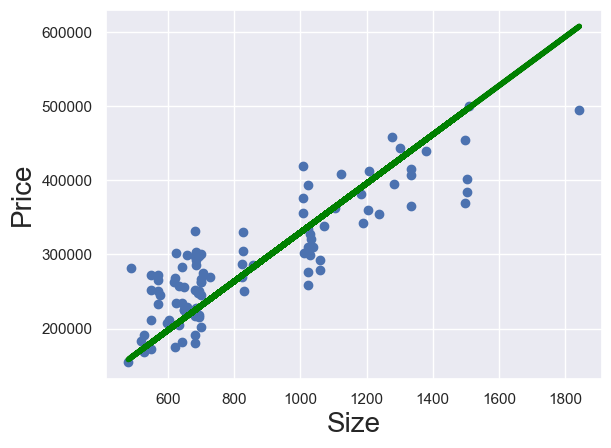

In [54]:
plt.scatter(x1, y)
yhat = x1*result.params[0] + 0 
fig = plt.plot(x1, yhat, lw=4, c = 'green', label='regression line')
plt.xlabel('Size', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.show()